In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as matim
import ipywidgets as widgets

In [4]:
img = matim.imread('./images/me.jpeg')

In [17]:
#Edge Mask
def edge_mask( img, ksize, block_size ):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
    gray_median = cv2.medianBlur( gray, ksize )
    edges = cv2.adaptiveThreshold( gray_median, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, ksize )
    return edges

In [86]:
edge_img = edge_mask( img, 7, 7 )

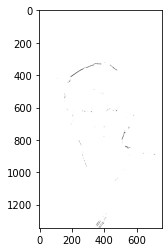

In [87]:
plt.imshow( edge_img, cmap = 'gray')

In [88]:
def kmeans_cluster(img, k):
    #Transform image
    data = np.float32(img).reshape( (-1, 3) )

    criteria = ( cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001  )
    #k means
    ret, label, center = cv2.kmeans( data, k, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS )
    center = np.uint8( center )
    result = center[ label.flatten() ]
    result = result.reshape(img.shape)
    return result

In [89]:
cluster_img = kmeans_cluster( img, 6 )

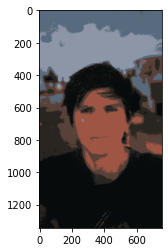

In [90]:
plt.imshow( cluster_img )

In [91]:
#Apply bilateral filter
d = 7
sigmacolor = 200 #superior to 100
sigmaspace = 200 #superior to 200
bilateral = cv2.bilateralFilter( cluster_img, d = d, sigmaColor = sigmacolor, sigmaSpace = sigmaspace )
cartoon = cv2.bitwise_and( bilateral, bilateral, mask = edge_img )

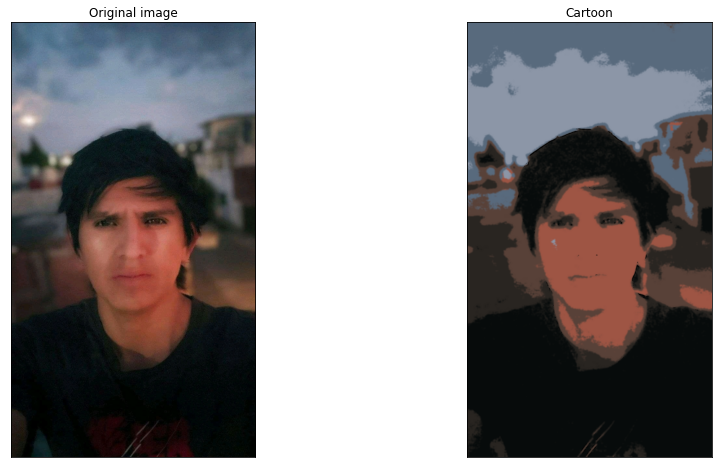

In [95]:
#display output
plt.figure( figsize = ( 15, 8 ) )
plt.subplot( 1, 2, 1 ) # original image
plt.imshow(img)
plt.yticks( [] ), plt.xticks( [] )
plt.title( 'Original image' )
plt.subplot( 1, 2, 2 ) #filtered image
plt.imshow( cartoon )
plt.title('Cartoon')
plt.yticks( [] ),plt.xticks( [] )
plt.show()

In [96]:
cv2.imwrite('./images/cartoon.png', cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR))

True